In [162]:
import pandas as pd
import numpy as np
import os
from collections import Counter
import random
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D

In [163]:
from sklearn import svm, preprocessing, metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from sklearn.metrics import roc_curve, auc
from sklearn.dummy import DummyClassifier

In [165]:
data_path = 'face_data/all_pilots/two_classes/fd_1500_all.csv'

data = pd.read_csv(data_path)
x = data.drop(columns=['type']) # Features
y = data['type'] # Labels
x

,AU01_r_max,AU02_r_max,AU04_r_max,AU05_r_max,AU06_r_max,AU07_r_max,AU09_r_max,AU10_r_max,AU12_r_max,AU14_r_max,...,AU10_r_sd,AU12_r_sd,AU14_r_sd,AU15_r_sd,AU17_r_sd,AU20_r_sd,AU23_r_sd,AU25_r_sd,AU26_r_sd,AU45_r_sd
0,1.96,1.28,0.70,0.74,0.84,0.96,2.66,0.82,0.27,0.73,...,0.163504,0.070361,0.180347,0.000000,0.117914,0.041740,0.208949,0.251880,0.161573,0.000000
1,1.75,1.53,0.81,1.44,1.03,1.51,2.36,0.61,0.47,0.87,...,0.175608,0.149772,0.243483,0.000000,0.164085,0.000000,0.169235,0.090149,0.078494,0.000000
2,1.25,1.60,0.87,1.51,1.68,1.49,2.52,0.62,0.33,1.27,...,0.165507,0.112172,0.257599,0.000000,0.214771,0.189320,0.236253,0.000000,0.004472,0.131183
3,1.20,1.75,0.65,1.19,0.78,0.86,2.76,0.52,0.29,0.54,...,0.123236,0.088299,0.096068,0.000000,0.138905,0.113698,0.250315,0.220221,0.000000,0.000000
4,1.42,1.57,0.74,1.17,0.70,1.18,2.24,0.82,0.38,0.87,...,0.214160,0.091067,0.212280,0.000000,0.155514,0.000000,0.223830,0.268747,0.047474,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313,0.98,0.83,0.00,1.26,0.00,0.00,1.61,0.48,0.18,0.27,...,0.102713,0.050301,0.087922,0.106771,0.000000,0.026726,0.000000,0.090250,0.000000,0.000000
314,1.49,0.58,0.00,1.58,1.84,1.37,2.14,1.99,0.84,0.55,...,0.331254,0.152392,0.146755,0.236844,0.218263,0.000000,0.148992,0.022702,0.103128,0.000000
315,1.18,1.24,0.00,1.20,1.16,0.00,1.71,1.40,0.51,0.57,...,0.222261,0.134699,0.189053,0.135051,0.156692,0.000000,0.132413,0.000000,0.000000,0.032717
316,2.07,0.00,1.88,1.42,0.00,0.46,0.38,0.00,0.00,0.00,...,0.000000,0.000000,0.000000,0.095122,0.000000,0.184004,0.000000,0.000000,0.000000,0.171113


In [300]:
def get_AU_cols(nums, s):
    # return AU column name
    r = []
    for x in nums:
        start = f'AU{str(x).zfill(2)}_r'
        for stat in s:
            r += [f'{start}_{stat}']
    return r

selected_AUs = [1, 4, 7, 10, 15]
x_new = x[get_AU_cols(selected_AUs, ['max', 'mean'])]
# x_new = x

In [354]:
# X_new = X[list(feature_imp.index)[0:15]]
seed = 109

# Split dataset into training set and test set
x_train, x_test, y_train, y_test = train_test_split(x_new, y, test_size=0.3)

# normalize inputs
normalizer = preprocessing.Normalizer()
x_train_norm = normalizer.fit_transform(x_train)
x_test_norm = normalizer.transform(x_test)

# oversample inputs
over = {'random': RandomOverSampler(),
        'smote': SMOTE(),
        'adasyn': ADASYN()}


# seeded version

# over = {'random': RandomOverSampler(random_state=seed),
#         'smote': SMOTE(random_state=seed),
#         'adasyn': ADASYN(random_state=seed)}

# # x_train_norm, y_train = over['smote'].fit_resample(x_train_norm, y_train)


# x_train_norm, y_train = over['adasyn'].fit_resample(x_train_norm, y_train)

In [416]:
clf = RandomForestClassifier(n_estimators=50, max_depth=6, max_features = x_new.shape[1], class_weight='balanced')
clf.fit(x_train_norm, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=6, max_features=10,
                       n_estimators=50)

In [417]:
y_pred = clf.predict(x_test_norm)

print("F1 score:", metrics.f1_score(y_test, y_pred, pos_label='down'))

F1 score: 0.125


In [414]:
y_pred_train = clf.predict(x_train_norm)

print("F1 score:", metrics.f1_score(y_train, y_pred_train, pos_label='down'))

F1 score: 0.970873786407767


In [385]:
# Compare to Dummy
dummy_clf = DummyClassifier(strategy="stratified")
dummy_clf.fit(x_train_norm, y_train)
dummy_pred = dummy_clf.predict(x_test_norm)
print("F1 score:", metrics.f1_score(y_test, dummy_pred, pos_label='down'))

F1 score: 0.27906976744186046


In [386]:
# feature_imp = pd.Series(clf.feature_importances_,index=X.columns).sort_values(ascending=False)
# list(feature_imp.index)

In [387]:
print('Train: ', Counter(y_train))
print('Test: ', Counter(y_test))

Train:  Counter({'up': 171, 'down': 51})
Test:  Counter({'up': 78, 'down': 18})


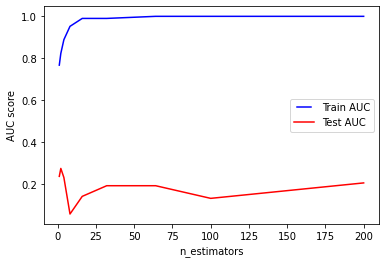

In [359]:
# parameter searching
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
train_results = []
test_results = []
for estimator in n_estimators:
    rf = RandomForestClassifier(n_estimators=estimator, max_features = x_new.shape[1], class_weight='balanced', random_state=109)
    rf.fit(x_train_norm, y_train)
    train_pred = rf.predict(x_train_norm)
    train_results.append(metrics.f1_score(y_train, train_pred, pos_label='down'))
    y_pred = rf.predict(x_test_norm)
    test_results.append(metrics.f1_score(y_test, y_pred, pos_label='down'))
line1, = plt.plot(n_estimators, train_results, 'b', label="Train AUC")
line2, = plt.plot(n_estimators, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('n_estimators')
plt.show()

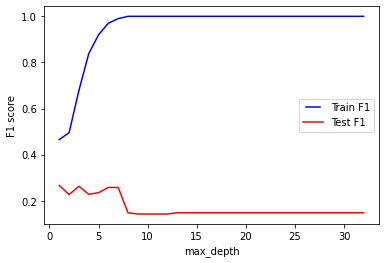

In [363]:
# parameter searching
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []
# for estimator in n_estimators:
for max_depth in max_depths:
    rf = RandomForestClassifier(max_depth=max_depth, class_weight='balanced', random_state=109)
    rf.fit(x_train_norm, y_train)
    train_pred = rf.predict(x_train_norm)
    train_results.append(metrics.f1_score(y_train, train_pred, pos_label='down'))
    y_pred = rf.predict(x_test_norm)
    test_results.append(metrics.f1_score(y_test, y_pred, pos_label='down'))
line1, = plt.plot(max_depths, train_results, 'b', label="Train F1")
line2, = plt.plot(max_depths, test_results, 'r', label="Test F1")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('F1 score')
plt.xlabel('max_depth')
plt.show()

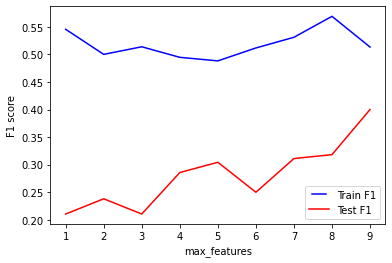

In [362]:
max_features = list(range(1,x_new.shape[1]))
# parameter searching
train_results = []
test_results = []
for m in max_features:
    rf = RandomForestClassifier(max_features=m, class_weight='balanced', n_estimators = 32, max_depth=2)
    rf.fit(x_train_norm, y_train)
    train_pred = rf.predict(x_train_norm)
    train_results.append(metrics.f1_score(y_train, train_pred, pos_label='down'))
    y_pred = rf.predict(x_test_norm)
    test_results.append(metrics.f1_score(y_test, y_pred, pos_label='down'))
line1, = plt.plot(max_features, train_results, 'b', label="Train F1")
line2, = plt.plot(max_features, test_results, 'r', label="Test F1")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('F1 score')
plt.xlabel('max_features')
plt.show()

In [14]:
r = pd.DataFrame(columns=['test', 'pred'])
r['test'], r['pred'] = y_test, y_pred
r

,test,pred
39,up,up
36,up,up
3,up,up
28,up,down
49,up,up
40,up,up
54,up,down
68,down,down
30,up,down
59,up,up
